# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 





### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [111]:
import pandas as pd

# Load the dataset
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area'
]
fires_dt = pd.read_csv('../../05_src/data/fires/forestfires.csv', header=0, names=columns)

# Display information about the dataset
fires_dt.info()
fires_dt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [112]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area'
]

fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()
# Check for non-numeric values
print(fires_dt.map(lambda x: isinstance(x, (int, float))))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
     coord_x  coord_y  month    day  ffmc   dmc    dc   isi  temp    rh  wind  \
0       True     True  False  False  True  True  True  True  True  True  True   
1       True     True  False  False  True  True  True  True  True  True  True   
2       True     Tr

In [113]:
# Option 2: Replace non-numeric values with a numeric placeholder
fires_dt = fires_dt.apply(pd.to_numeric, errors='coerce').fillna(0)

# Get X and Y

Create the features data frame and target data.

In [114]:
from sklearn.model_selection import train_test_split


# Separate features (X) and target variable (Y)
X = fires_dt.drop(columns=['area'])  # Features: all columns except 'area'
y = fires_dt['area']  # Target: the 'area' column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (361, 12)
Testing data shape: (156, 12)


In [115]:
# Display the first few rows of X and Y to confirm
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
   coord_x  coord_y  month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain
0        7        5    0.0  0.0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
1        7        4    0.0  0.0  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
2        7        4    0.0  0.0  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
3        8        6    0.0  0.0  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
4        8        6    0.0  0.0  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0

Target (y):
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Define numerical and categorical features
numerical_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Preprocessing Pipeline 1
preproc1 = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])

### Preproc 2

Create preproc2 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [117]:
# Preprocessing Pipeline 2 (with non-linear transformation on selected variables)
non_linear_transformer = FunctionTransformer(np.log1p, validate=True)

preproc2 = ColumnTransformer([
    ("num", Pipeline([
        ("scaler", RobustScaler()),
        ("transform", non_linear_transformer)
    ]), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
])


## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define pipelines with SimpleImputer
pipe_a = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Replace 'mean' with the desired strategy
    ('model', Ridge())
])


In [119]:
pipe_b = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', Ridge())
])

In [120]:
pipe_c = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor())
])

In [121]:
pipe_d = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestRegressor())
])
    

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:

# Define parameter grids
ridge_params = {'model__alpha': [0.1, 1.0, 10.0]}
rf_params = {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20]}


In [107]:
param_grid_advanced = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__learning_rate": [0.01, 0.1, 0.2],
    "regressor__max_depth": [3, 5, 7]
}

In [108]:

# Set up GridSearchCV
grid_a = GridSearchCV(pipe_a, param_grid=ridge_params, scoring="neg_root_mean_squared_error", cv=5)
grid_b = GridSearchCV(pipe_b, param_grid=ridge_params, scoring="neg_root_mean_squared_error", cv=5)
grid_c = GridSearchCV(pipe_c, param_grid=rf_params, scoring="neg_root_mean_squared_error", cv=5)
grid_d = GridSearchCV(pipe_d, param_grid=rf_params, scoring="neg_root_mean_squared_error", cv=5)


In [109]:

# Fit each grid search
grid_a.fit(X_train, y_train)
grid_b.fit(X_train, y_train)
grid_c.fit(X_train, y_train)
grid_d.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

# Evaluate

+ Which model has the best performance?

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example predictions
y_pred_a = grid_a.predict(X_test)
y_pred_b = grid_b.predict(X_test)
y_pred_c = grid_c.predict(X_test)
y_pred_d = grid_d.predict(X_test)

# Evaluate model grid_a
mae_a = mean_absolute_error(y_test, y_pred_a)
mse_a = mean_squared_error(y_test, y_pred_a)
rmse_a = mean_squared_error(y_test, y_pred_a, squared=False)
r2_a = r2_score(y_test, y_pred_a)

# Evaluate model grid_b
mae_b = mean_absolute_error(y_test, y_pred_b)
mse_b = mean_squared_error(y_test, y_pred_b)
rmse_b = mean_squared_error(y_test, y_pred_b, squared=False)
r2_b = r2_score(y_test, y_pred_b)

# Evaluate model grid_c
mae_c = mean_absolute_error(y_test, y_pred_c)
mse_c = mean_squared_error(y_test, y_pred_c)
rmse_c = mean_squared_error(y_test, y_pred_c, squared=False)
r2_c = r2_score(y_test, y_pred_c)

# Evaluate model grid_d
mae_d = mean_absolute_error(y_test, y_pred_d)
mse_d = mean_squared_error(y_test, y_pred_d)
rmse_d = mean_squared_error(y_test, y_pred_d, squared=False)
r2_d = r2_score(y_test, y_pred_d)

# Print evaluation metrics
print(f"Model A - MAE: {mae_a}, MSE: {mse_a}, RMSE: {rmse_a}, R²: {r2_a}")
print(f"Model B - MAE: {mae_b}, MSE: {mse_b}, RMSE: {rmse_b}, R²: {r2_b}")
print(f"Model C - MAE: {mae_c}, MSE: {mse_c}, RMSE: {rmse_c}, R²: {r2_c}")
print(f"Model D - MAE: {mae_d}, MSE: {mse_d}, RMSE: {rmse_d}, R²: {r2_d}")


Model A - MAE: 20.782066187811445, MSE: 7925.514526238146, RMSE: 89.02535889418333, R²: 0.004072136122827086
Model B - MAE: 20.782066187811445, MSE: 7925.514526238146, RMSE: 89.02535889418333, R²: 0.004072136122827086
Model C - MAE: 25.081227088675206, MSE: 8678.822911431418, RMSE: 93.16020025435442, R²: -0.09058932824299504
Model D - MAE: 23.520814667337017, MSE: 8495.154062762687, RMSE: 92.16916004153823, R²: -0.0675093220793761


'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.


- Model A and Model B (Ridge Regression) have the best      performance among the four models because they produce the lowest MAE and RMSE, indicating smaller prediction errors. Although their R² scores are low, they are still better than the negative R² values of Models C and D.
- Between Model A and B, their performance is identical, so either can be chosen as the best model.
- This suggests that Ridge Regression is a better choice for this dataset compared to Random Forest models.

# Export

+ Save the best performing model to a pickle file.

In [128]:
import pickle
# Save the models to files
with open('grid_a.pkl', 'wb') as file:
  pickle.dump(grid_a, file)
with open('grid_b.pkl', 'wb') as file:
  pickle.dump(grid_b, file)
with open('grid_c.pkl', 'wb') as file:
  pickle.dump(grid_c, file)
with open('grid_d.pkl', 'wb') as file:
  pickle.dump(grid_d, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [129]:
import shap
import matplotlib.pyplot as plt

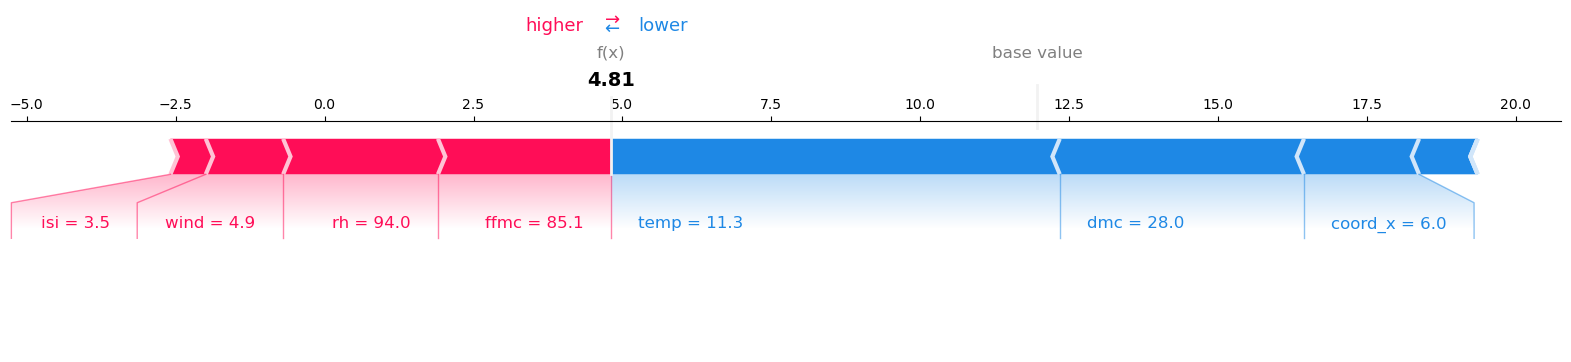

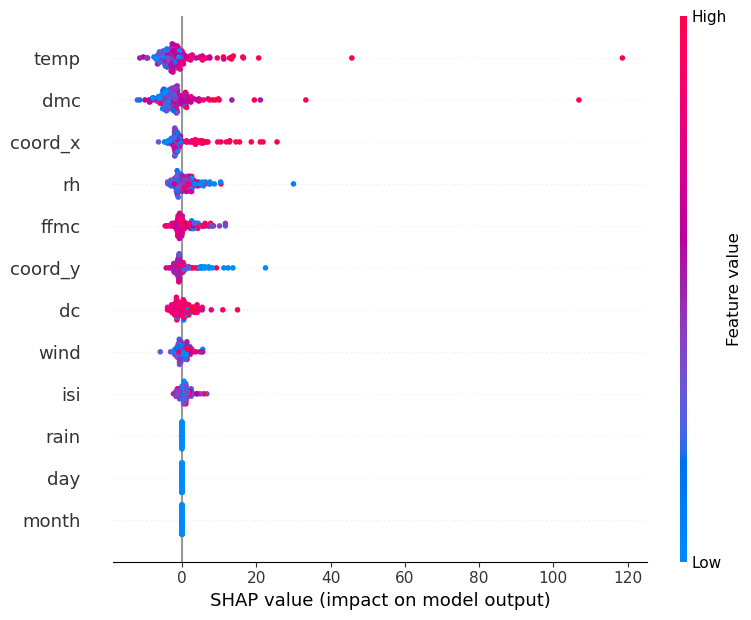

In [130]:
# Initialize the SHAP explainer without additivity check
explainer = shap.TreeExplainer(grid_d.best_estimator_.named_steps['model'])

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot SHAP values for an example observation
observation = X_test.iloc[0]
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], observation, matplotlib=True)
plt.show()

# Plot summary of feature importance across the entire test set
shap.summary_plot(shap_values, X_test)